# Independent component analisys(ICA) for image decomposition#

The formal definition of independent component analysis is a computational method for separating a multivariate signal into additive subcomponents. Perhaps the most famous example is the cocktail party problem, but here we aim to demonstrate its application to a different scenario. In this notebook, we attempt to decompose an image into different components, which can be a challenging task. The main idea is to mix two images and then use independent component analysis to decompose it back into the original two images.
---



1. Importing the necessary libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA
from sklearn.preprocessing import scale

2: Loading and preprocessing the image


*   Load the image
*   Flatten(reshape) the image(In this way we are ensuring that each pixel is treated as an independent observation. By reshaping the image into this vector representation, we can treat it as a two-dimensional dataset with rows representing individual observations (pixels) and columns representing different features (RGB values).

Example:Image before flattening:
[[[ 51  59  48]
  [ 49  57  46]
  [ 43  49  39]
  ...
  [110 188 200]
  [108 186 198]
  [104 182 194]]

 [[ 56  64  53]
  [ 56  64  53]
  [ 56  62  52]
  ...
  [107 185 197]
  [105 183 195]
  [103 181 193]]

 [[ 48  56  45]
  [ 43  51  40]
  [ 44  50  40]
  ...
  [100 178 190]
  [103 181 193]
  [109 187 199]]

 ...

 [[125 143 131]
  [124 142 130]
  [112 130 118]
  ...
  [  6  70  95]
  [  8  72  97]
  [  9  73  98]]

 [[122 140 128]
  [125 143 131]
  [125 143 131]
  ...
  [ 14  78 103]
  [  8  72  97]
  [ 10  74  99]]

 [[118 136 124]
  [124 142 130]
  [128 146 134]
  ...
  [ 10  76 100]
  [  3  69  93]
  [  9  75  99]]]
is converted to image after flattening
[[ 51  59  48]
 [ 49  57  46]
 [ 43  49  39]
 ...
 [ 10  76 100]
 [  3  69  93]
 [  9  75  99]]

)
*   Scale the image (ICA assumes that the features (pixel values) are independent and identically distributed with zero mean and unit variance, we are making sure that this is true by scaling the new image matrix)



In [25]:
img = plt.imread('mixed.jpg')
X = np.reshape(img, (-1, img.shape[-1]))
X = scale(X)

3: Performing Independent Component Analysis (ICA)

In [14]:
ica = FastICA(n_components=2)
S = ica.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


4: Reshaping the independent components

*   to visualize the independent components as images, we need to reshape the column vectors back into the original shape of the image. The original image shape is obtained from the variable img using img.shape[:-1], which excludes the channel dimension.



In [26]:
component1 = np.reshape(S[:, 0], img.shape[:-1])
component2 = np.reshape(S[:, 1], img.shape[:-1])

5: Displaying the results

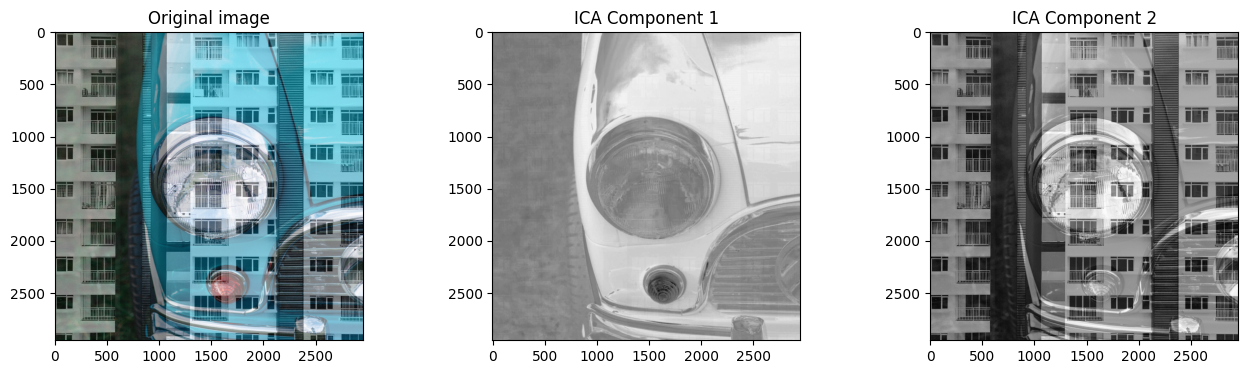

In [27]:
fig, ax = plt.subplots(1, 3, figsize=(16, 4))
ax[0].imshow(img)
ax[0].set_title('Original image')
ax[1].imshow(component1, cmap='gray')
ax[1].set_title('ICA Component 1')
ax[2].imshow(component2, cmap='gray')
ax[2].set_title('ICA Component 2')
plt.show()